# Observations and Insights 

## First Observation

testtestestsetsetsetsetsetestsetsetestsetsetsetestestest

# Matplotlib-Challenge: Charles Phil Week 5 Homework 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(len(merged_df['Mouse ID'].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by drug regimen from the cleaned data frame
regimen_df = clean_df.groupby(['Drug Regimen'])

# Get each descriptive statistic as a Series object, store into variables for later use
regimen_mean = regimen_df['Tumor Volume (mm3)'].mean()
regimen_median = regimen_df['Tumor Volume (mm3)'].median()
regimen_var = regimen_df['Tumor Volume (mm3)'].var()
regimen_std = regimen_df['Tumor Volume (mm3)'].std()
regimen_sem = regimen_df['Tumor Volume (mm3)'].sem()

# Put series into a data frame
regimen_summary = pd.DataFrame(
    {
        'mean': regimen_mean,
        'median': regimen_median,
        'variance': regimen_var,
        'standard deviation': regimen_std,
        'standard error': regimen_sem
    }
)

# Return the entire data frame
regimen_summary

,mean,median,variance,standard deviation,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_summary = regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

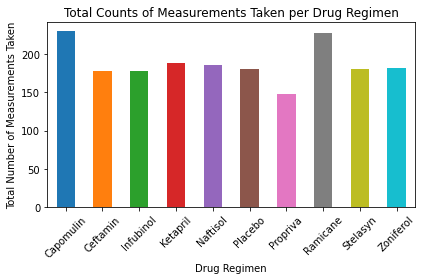

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create colors for each bar to represent each drug regimen
colors = [f'C{x}' for x in range(regimen_summary['mean'].count())]

# Count all recorded timepoints for each drug regimen
timepoints = regimen_df['Timepoint'].count()

# Plot bar chart using Pandas
pandas_bar = timepoints.plot(
    title='Total Counts of Measurements Taken per Drug Regimen', 
    ylabel='Total Number of Measurements Taken', 
    kind='bar', 
    rot=45,
    color=colors
)

# Tighten layout and display chart
plt.tight_layout()
plt.show() 

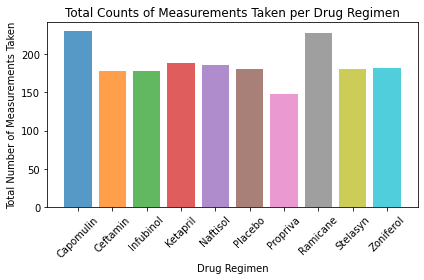

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create x-axis that is as long as the number of rows (i.e., drug regimens)
x_axis = np.arange(len(timepoints))

# Plot bar graph using pyplot
plt.bar(x_axis, timepoints, color=colors, alpha=0.75, align='center')

# Write x tick labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints.index, rotation=45)

# Write labels and title
plt.title('Total Counts of Measurements Taken per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements Taken')

# Tighten layout and show
plt.tight_layout()
plt.show()

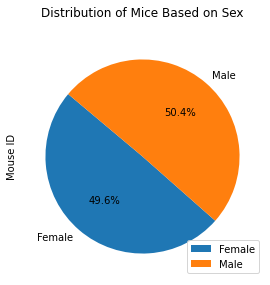

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by sex of mice and count number of each
sex_df = clean_df.groupby(['Sex'])

# Find number of unique mice in for each sex based on the mouse ID
sex_count = sex_df.agg({'Mouse ID': 'nunique'})

# Plot pie chart using Pandas
sex_count.plot(title='Distribution of Mice Based on Sex', autopct='%1.1f%%', subplots=True, kind='pie', startangle=140)

# Move the legend to a better spot
plt.legend(loc='lower right')

# Display plot
plt.tight_layout()
plt.show()

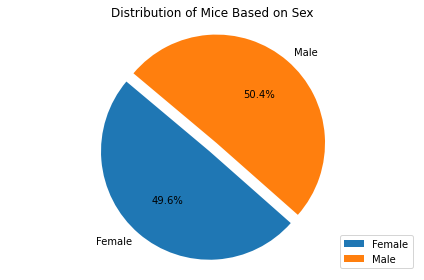

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot pie chart using pyplot, based on previous unique counts of female/male mice
pyplot_pie = plt.pie(sex_count['Mouse ID'], labels=sex_count.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))

# Add title and legend
plt.title('Distribution of Mice Based on Sex')
plt.legend(loc='lower right')

# Display plot
plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = clean_df.groupby(['Mouse ID'])
last_timepoints = mouse_df['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_recorded = pd.merge(clean_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dictionary to fill with tumor vol data (for plotting)
tumor_vols = {}

# Empty data frame to build summary into
quart_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_subset = last_recorded.loc[last_recorded['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    #  subset to dictionary
    tumor_vols[regimen] = list(regimen_subset)
    
    # Determine outliers using upper and lower bounds
    subset_quartiles = regimen_subset.quantile([0.25, 0.5, 0.75])
    lowerq = subset_quartiles[0.25]
    medianq = subset_quartiles[0.5]
    upperq = subset_quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Build results into temporary data frame
    quart_list = [
        {
            'drug': regimen, 
            'lower quartile': lowerq, 
            'median': medianq, 
            'upper quartile': upperq, 
            'iqr': iqr, 
            'lower bound': lower_bound, 
            'upper bound': upper_bound
        }
    ]
    subset_quart = pd.DataFrame(quart_list)

    # Append to empty summary data frame
    quart_df = quart_df.append(subset_quart)

    # Print drug regimen's potential upper and lower outliers
    print(f'{regimen} potential outliers:')
    print(f'Tumor volumes below {lower_bound} could be outliers.')
    print(f'Tumor volumes above {upper_bound} could be outliers.\n')

# Set index of summary data frame to drug regimens of interest
quart_df = quart_df.set_index(['drug'])

# Display all four regimens of interest
quart_df.head(4)

Capomulin potential outliers:
Tumor volumes below 20.70456164999999 could be outliers.
Tumor volumes above 51.83201549 could be outliers.

Ramicane potential outliers:
Tumor volumes below 17.912664470000003 could be outliers.
Tumor volumes above 54.30681135 could be outliers.

Infubinol potential outliers:
Tumor volumes below 36.83290494999999 could be outliers.
Tumor volumes above 82.74144559000001 could be outliers.

Ceftamin potential outliers:
Tumor volumes below 25.355449580000002 could be outliers.
Tumor volumes above 87.66645829999999 could be outliers.



,lower quartile,median,upper quartile,iqr,lower bound,upper bound
drug,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


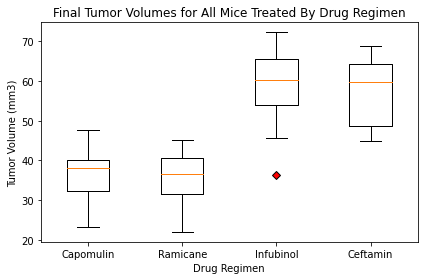

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Dictionary to hold color and shape values for outlier information
red_diamond = {'markerfacecolor': 'r', 'marker': 'D'}

# Set up box plots using tumor_vol dictionary holding each drug's tumor volume values
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vols.values(), flierprops=red_diamond)

# Format ticks to be each drug, set labels and title
ax1.set_xticklabels(tumor_vols.keys())
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volumes for All Mice Treated By Drug Regimen')

# Display plots
plt.tight_layout()
plt.show()

## Line and Scatter Plots

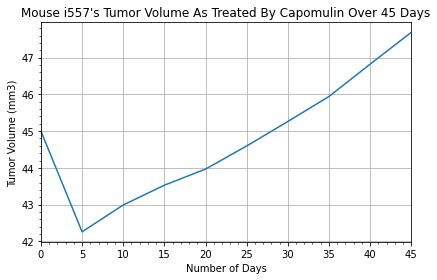

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Mouse ID: i557 - get timepoints and tumor volumes and set index to the timepoint to plot using pandas
mouse_df = clean_df.loc[clean_df['Mouse ID'] == 'i557', ['Timepoint', 'Tumor Volume (mm3)']]
mouse_df = mouse_df.set_index(['Timepoint'])

# Plot timepoints and tumor volume
mouse_df.plot(
    title="Mouse i557's Tumor Volume As Treated By Capomulin Over 45 Days",
    xlabel="Number of Days", 
    ylabel="Tumor Volume (mm3)", 
    legend=False,
    grid=True
)

# Display line plot
plt.xlim(mouse_df.index.min(), mouse_df.index.max())
plt.minorticks_on()
plt.tight_layout()
plt.show()

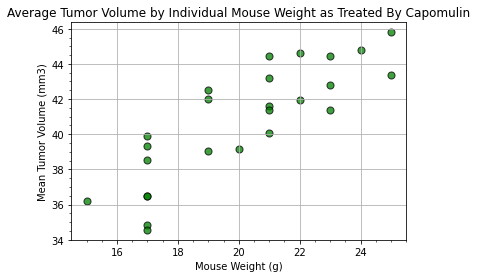

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Get subset of mice treated by Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Group by weight AND Mouse ID. Each mice in each weight class will have different average tumor volumes.
# In my opinion, it will not make too much sense to aggregate them all by weight class for the purposes of determining
# correlation and regression.
weights_df = capomulin_df.groupby(['Weight (g)', 'Mouse ID'])

# Determine mean tumor volumes for each mice in each weight class
avg_vol = weights_df['Tumor Volume (mm3)'].mean()

# Plot with matplotlib (pandas requires DataFrame for scatter plot) based on the first level index (weight)
plt.scatter(
    avg_vol.index.get_level_values('Weight (g)'), 
    avg_vol, 
    marker='o', 
    facecolors='green', 
    edgecolors='black', 
    s=50, 
    alpha=0.75
)

# Add labels and title
plt.title('Average Tumor Volume by Individual Mouse Weight as Treated By Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')

# Display plot
plt.minorticks_on()
plt.grid()
plt.show()

## Correlation and Regression

The correlation coefficient (r-value) between individual mouse weights and their average tumor volume as treated by Capomulin is 0.84.


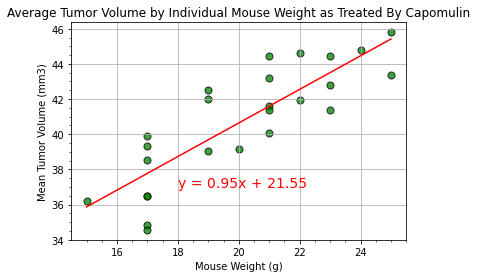

In [20]:
# Calculate the correlation coefficient and linear regression model 

# Get slope, y-intercept, r-value, p-value, standard error values from linregress to plot regression line.
# Linregress returns 5 values, so even if we don't use pval and sterr, 
# we must catch those to avoid a ValueError.
(slope, yint, rval, pval, sterr) = st.linregress(avg_vol.index.get_level_values('Weight (g)'), avg_vol)

print("The correlation coefficient (r-value) between individual mouse weights and their "
      f"average tumor volume as treated by Capomulin is {round(rval, 2)}.")

# Get "y" values for our regression line. Use x values from data, multiply by slope, add by y-intercept
regress_val = avg_vol.index.get_level_values('Weight (g)') * slope + yint

# Equation of regression line for later annotation
line_eq = f"y = {round(slope, 2)}x + {round(yint, 2)}"

# Redraw scatter plot
plt.scatter(
    avg_vol.index.get_level_values('Weight (g)'), 
    avg_vol, 
    marker='o', 
    facecolors='green', 
    edgecolors='black', 
    s=50, 
    alpha=0.75
)

# Add labels and title to figure
plt.title('Average Tumor Volume by Individual Mouse Weight as Treated By Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')

# Add ticks and grid
plt.minorticks_on()
plt.grid()

# Plot regression line onto figure
plt.plot(avg_vol.index.get_level_values('Weight (g)'), regress_val, color='r')

# Annotate regression line equation onto figure
plt.annotate(line_eq, (18, 37), fontsize=14, color="r")

# Display figure
plt.show()